# ***Linear Regression***
---
---

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

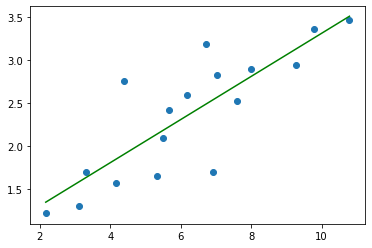

In [27]:
a = np.array([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
b = np.array([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
plt.scatter(a,b)
plt.plot(np.unique(a), np.poly1d(np.polyfit(a, b, 1))(np.unique(a)), 'g-')

In [28]:
data = pd.read_csv('data.csv')
data.head()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


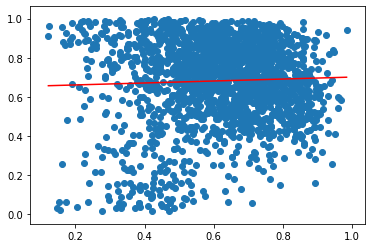

In [25]:
x = data['danceability']
y = data['energy']
plt.scatter(x,y)
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), 'r-')  #built in with numpy


## Find Slope and Intercept (Weights)

In [60]:
def slope_intercept_LR(x, y, step, epochs):
    x_bar = np.mean(x)  # 1
    y_bar = np.mean(y)  # 2
    xy_bar = np.mean(x*y)  # 3
    x_squared_bar = np.mean(x**2)   # 4
    x_bar_squared = (np.mean(x))**2 #5
    w1 = (xy_bar - (x_bar * y_bar))/(x_squared_bar-x_bar_squared)
    w0 = (-w1*x_bar)+y_bar
    print('Slope is / Weight 1 :', w1)
    print('Intercept / Weight 2 is:', w0, '\n')
    return w1, w0
        
print(slope_intercept_LR(x, y, 0.01, 5000))

Slope is / Weight 1 : 0.05034768176424329
Intercept / Weight 2 is: 0.6504410345649969 

(0.05034768176424329, 0.6504410345649969)


## ___Gradient Descent___
---

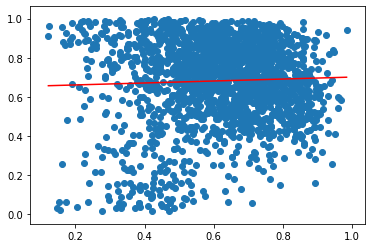

In [64]:
w1 = 0.05034768176424329
w0 = 0.6504410345649969
y_pred = w1*x+w0


plt.scatter(x, y)
# Verify via formula
plt.plot([min(x), max(x)], [min(y_pred), max(y_pred)], 'r')  # regression line

## MSE

In [66]:
def min_sq_error(y, x, w1, w0):
    y_pred = [w1*i+w0 for i in x]
    sum_squared_error = sum((y_pred-y)**2)
    N = len(y)
    mse = sum_squared_error/N
    return mse

# Via my calculations
print("MSE via my calculations: ", min_sq_error(y, x, 0.05034768176424329, 0.6504410345649969))

MSE via my calculations:  0.04412711932424555


# ___R-Squared ()___
---

In [68]:

w_1 = 0.05034768176424329
w_0 = 0.6504410345649969

x_bar = np.round(np.mean(x), 3)
y_bar = np.round(np.mean(y), 3)
print(f"X mean is {x_bar} and Y mean is {y_bar}\n".format())

# Y pred
y_pred_r = [w_1*i+w_0 for i in x]
# print("Y predictions are: ", y_pred)

# SS res
SSres = sum((y-y_pred)**2)
print("\nSum of squares residual: ", SSres)

# SS reg
SSreg = sum((y_pred-y_bar)**2)
print("\nSum of squares regression: ", SSreg)

# SS tot
SStot = sum((y-y_bar)**2)
print("\nSum of squares total: ", SStot)

# R-squared
r_squared = 1 - (SSres/SStot)
print("\nR-squared is: ", r_squared)

X mean is 0.618 and Y mean is 0.682


Sum of squares residual:  89.00439967700328

Sum of squares regression:  0.13287335299666775

Sum of squares total:  89.13727302999996

R-squared is:  0.0014906598382470326


R-Squared is:  0.001486619805587841


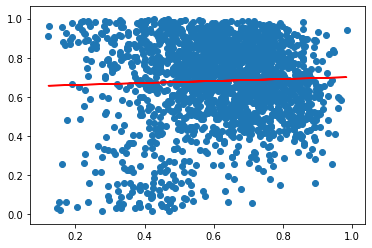

In [63]:
def r_sq(x, y, w1, w0):
    y_bar = np.mean(y)
    y_pred_r = [w_1*i+w_0 for i in x]
    SSres = sum((y-y_pred_r)**2)
    SStot = sum((y-y_bar)**2)
    r_squared = 1 - (SSres/SStot)
    return r_squared

print("R-Squared is: ", r_sq(x, y, 0.25163494, 0.79880123))
plt.scatter(x, y)
plt.plot(x, y_pred_r, 'r-')